In [45]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer as MICE
from sklearn.cluster import KMeans
import seaborn as sns
import pygeohash as pgh
from matplotlib import pyplot as plt

In [46]:
#function which scales the numerical features of a dataframe
def prepare_num_features(X, cols):
    scaler = StandardScaler()  
    sca = scaler.fit_transform(X.values) 
    return pd.DataFrame(sca, columns = cols)

In [47]:
#load data
df = pd.read_csv('cleaned_data/full_cleaned_data.csv')
df = df.drop(df.columns[0], axis = 1)

In [48]:
#sort dataframe by users and time
df = df.sort_values(by = ['EthicaID', 'startTime']).reset_index(drop = True)

In [49]:
df.head()

,endTimeMillis,MobileDNA,model,session,startTimeMillis,startTime,endTime,notification,notificationId,app_id,...,latitude,longitude,studyKey,surveyId,data_version,App Name,category,EthicaID,age,sex
0,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:47:02.731,2020-03-10T17:47:11.694,True,1.0,com.whatsapp,...,51.42149,5.68388,MYPHONE,11041999matipe,1.6,WhatsApp Messenger,Communication,User #10599,20.75,2
1,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:47:12.582,2020-03-10T17:47:44.825,False,0.0,be.ugent.mobiledna,...,51.42149,5.68388,MYPHONE,11041999matipe,1.6,mobileDNA,Lifestyle,User #10599,20.75,2
2,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:47:47.168,2020-03-10T17:49:49.513,False,0.0,com.ethica.logger,...,51.42149,5.68388,MYPHONE,11041999matipe,1.6,Ethica,Tools,User #10599,20.75,2
3,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:49:50.814,2020-03-10T17:50:13.995,False,0.0,com.ethica.logger,...,51.42149,5.68388,MYPHONE,11041999matipe,1.6,Ethica,Tools,User #10599,20.75,2
4,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:50:15.502,2020-03-10T17:50:15.507,False,0.0,com.ethica.logger,...,51.42149,5.68388,MYPHONE,11041999matipe,1.6,Ethica,Tools,User #10599,20.75,2


# Missing data imputation

In [50]:
df.loc[df['EthicaID'] == 'User #23926']['age'].values

array([nan, nan, nan, ..., nan, nan, nan])

In [51]:
df.isna().sum()

endTimeMillis            0
MobileDNA                0
model                    0
session                  0
startTimeMillis          0
startTime                0
endTime                  0
notification             0
notificationId           0
app_id                   0
battery                  0
latitude           1114792
longitude          1114792
studyKey                 0
surveyId                 0
data_version             0
App Name                 0
category                 0
EthicaID                 0
age                  52606
sex                      0
dtype: int64

In [52]:
#impute missing values
trans = MICE(verbose=False)
f_complete = trans.fit_transform(df[['battery', 'sex', 'age', 'latitude', 'longitude']])
f_complete = pd.DataFrame(f_complete).set_axis(['battery', 'sex', 'age', 'latitude', 'longitude'], axis = 1)
f_complete = f_complete[['latitude', 'longitude', 'age']]
df = df.drop(['latitude', 'longitude', 'age'], axis = 1)
df = pd.concat([f_complete.reset_index(drop = True), df.reset_index(drop = True)], axis = 1)

In [53]:
df.loc[df['EthicaID'] == 'User #23926']['age'].values[:10]

array([21.07423999, 21.07423999, 21.07423999, 21.07423999, 21.07423999,
       21.07423999, 21.07423999, 21.08006919, 21.08006919, 21.08006919])

In [54]:
df.columns

Index(['latitude', 'longitude', 'age', 'endTimeMillis', 'MobileDNA', 'model',
       'session', 'startTimeMillis', 'startTime', 'endTime', 'notification',
       'notificationId', 'app_id', 'battery', 'studyKey', 'surveyId',
       'data_version', 'App Name', 'category', 'EthicaID', 'sex'],
      dtype='object')

In [55]:
df.isna().sum()

latitude           0
longitude          0
age                0
endTimeMillis      0
MobileDNA          0
model              0
session            0
startTimeMillis    0
startTime          0
endTime            0
notification       0
notificationId     0
app_id             0
battery            0
studyKey           0
surveyId           0
data_version       0
App Name           0
category           0
EthicaID           0
sex                0
dtype: int64

In [56]:
df.head()

,latitude,longitude,age,endTimeMillis,MobileDNA,model,session,startTimeMillis,startTime,endTime,...,notificationId,app_id,battery,studyKey,surveyId,data_version,App Name,category,EthicaID,sex
0,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:47:02.731,2020-03-10T17:47:11.694,...,1.0,com.whatsapp,53.0,MYPHONE,11041999matipe,1.6,WhatsApp Messenger,Communication,User #10599,2
1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:47:12.582,2020-03-10T17:47:44.825,...,0.0,be.ugent.mobiledna,53.0,MYPHONE,11041999matipe,1.6,mobileDNA,Lifestyle,User #10599,2
2,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:47:47.168,2020-03-10T17:49:49.513,...,0.0,com.ethica.logger,53.0,MYPHONE,11041999matipe,1.6,Ethica,Tools,User #10599,2
3,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:49:50.814,2020-03-10T17:50:13.995,...,0.0,com.ethica.logger,53.0,MYPHONE,11041999matipe,1.6,Ethica,Tools,User #10599,2
4,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10T17:50:15.502,2020-03-10T17:50:15.507,...,0.0,com.ethica.logger,53.0,MYPHONE,11041999matipe,1.6,Ethica,Tools,User #10599,2


# Time-related features

In [57]:
#convert startTime and endTime to type datetime in uct format
df['startTime'] = pd.to_datetime(df['startTime'], utc=True)
df['endTime'] = pd.to_datetime(df['endTime'], utc=True)

In [58]:
##add a new column which shows the duration of usage in minutes (later used to build target)
df['use_duration'] = df['use_duration'] = (df['endTime'] - df['startTime']).apply(lambda x: x.total_seconds())

##add new variables with the time, the hours and date
df['date'] = df['startTime'].dt.date
df['time'] = df['startTime'].dt.time
df['hours'] = df['startTime'].dt.strftime('%H')

#add the weekday with 0 being Monday and 6 being Sunday
df['weekday'] = df['startTime'].dt.dayofweek

#drop one row were the use duration is negative
df = df.drop(df.loc[df['use_duration'] < 0]['use_duration'].index)

#construct session id --> one sessions means no more than 5 minutes between two following app events
lst = []
j = 1
for i in range(len(df)): 
    if i == 0: 
        lst.append(j)
    else: 
        if df.iloc[i]['EthicaID'] != df.iloc[i-1]['EthicaID']: 
            j+=1
            lst.append(j)
        else: 
            d = df.iloc[i]['startTime'] - df.iloc[i-1]['endTime']
            d = d.total_seconds() / 60
            if d <= 5: 
                lst.append(j)
            else: 
                j+=1
                lst.append(j)
df_lst = pd.DataFrame(lst)

session_id = pd.DataFrame(lst)

session_id = session_id.rename({0: 'session_id'}, axis = 1)

In [59]:
df_lst = pd.read_csv('cleaned_data/session_id.csv')

In [60]:
df_lst = df_lst[['session_id']]

In [61]:
#build two dataframes to compute session length
df = pd.concat([df_lst, df], axis = 1).rename({0: 'session_id'}, axis = 1)
df_session_start = df[['EthicaID', 'session_id', 'startTime']].groupby(['EthicaID', 'session_id']).min().reset_index()
df_session_end = df[['EthicaID', 'session_id', 'endTime']].groupby(['EthicaID', 'session_id']).max().reset_index()

#merge them
df_session_timerange = pd.merge(df_session_start, df_session_end, on = ['EthicaID', 'session_id'])
df_session_timerange = df_session_timerange.rename(columns={'startTime': 'startTime_session', 'endTime': 'endTime_session'})

#compute the sessions duration for each row and convert it to minutes
df_session_timerange['session_duration'] = df_session_timerange['endTime_session'] - df_session_timerange['startTime_session']
df_session_timerange['session_duration'] = df_session_timerange['session_duration'].apply(lambda x: x.total_seconds())

display(df_session_timerange.head())

#merge session length to appevent dataframe
df = pd.merge(df, df_session_timerange, on = ['EthicaID', 'session_id'])

,EthicaID,session_id,startTime_session,endTime_session,session_duration
0,User #10599,1,2020-03-10 17:47:02.731000+00:00,2020-03-10 18:11:39.476000+00:00,1476.745
1,User #10599,2,2020-03-10 18:26:17.268000+00:00,2020-03-10 18:33:51.128000+00:00,453.860
2,User #10599,3,2020-03-10 20:07:07.356000+00:00,2020-03-10 20:10:42.767000+00:00,215.411
3,User #10599,4,2020-03-10 20:30:16.311000+00:00,2020-03-10 20:30:29.595000+00:00,13.284
4,User #10599,5,2020-03-10 20:40:09.459000+00:00,2020-03-10 20:45:59.006000+00:00,349.547


In [96]:
#check results to detect irregularities
df[['session_id', 'EthicaID', 'startTime', 'session_duration']].groupby(['EthicaID', 'session_id']).min().sort_values('session_duration')

startTime  session_duration
EthicaID    session_id                                                   
User #24248 508948     2020-04-13 16:45:15.827000+00:00             0.000
User #23924 319208     2020-02-07 20:38:32.583000+00:00             0.001
User #23876 246377     2020-01-26 18:16:42.421000+00:00             0.001
User #23837 225031     2020-04-23 11:46:03.006000+00:00             0.001
User #23924 319141     2020-02-05 06:55:08.056000+00:00             0.001
...                                                 ...               ...
User #25203 570792     2020-03-28 23:51:54.891000+00:00         45568.330
User #15110 38503      2020-06-09 23:13:04.549000+00:00         45664.863
            37884      2020-05-15 22:44:32.070000+00:00         49324.289
User #23953 333757     2020-03-04 11:10:57.502000+00:00         49454.882
            334176     2020-04-06 12:48:47.628000+00:00         52820.560

[596486 rows x 2 columns]

In [63]:
#compute time of ongoing session
df['duration_ongoing_session'] = df['startTime'] - df['startTime_session']
df['duration_ongoing_session'] = df['duration_ongoing_session'].astype('timedelta64[s]')

In [64]:
df.columns

Index(['session_id', 'latitude', 'longitude', 'age', 'endTimeMillis',
       'MobileDNA', 'model', 'session', 'startTimeMillis', 'startTime',
       'endTime', 'notification', 'notificationId', 'app_id', 'battery',
       'studyKey', 'surveyId', 'data_version', 'App Name', 'category',
       'EthicaID', 'sex', 'use_duration', 'date', 'time', 'hours', 'weekday',
       'startTime_session', 'endTime_session', 'session_duration',
       'duration_ongoing_session'],
      dtype='object')

In [93]:
df[['EthicaID', 'session_id', 'startTime', 'endTime', 'session_duration', 'duration_ongoing_session']]

,EthicaID,session_id,startTime,endTime,session_duration,duration_ongoing_session
0,User #10599,1,2020-03-10 17:47:02.731000+00:00,2020-03-10 17:47:11.694000+00:00,1476.745,0.0
1,User #10599,1,2020-03-10 17:47:12.582000+00:00,2020-03-10 17:47:44.825000+00:00,1476.745,9.0
2,User #10599,1,2020-03-10 17:47:47.168000+00:00,2020-03-10 17:49:49.513000+00:00,1476.745,44.0
3,User #10599,1,2020-03-10 17:49:50.814000+00:00,2020-03-10 17:50:13.995000+00:00,1476.745,168.0
4,User #10599,1,2020-03-10 17:50:15.502000+00:00,2020-03-10 17:50:15.507000+00:00,1476.745,192.0
...,...,...,...,...,...,...
4419913,User #25569,596485,2020-04-22 01:01:28.068000+00:00,2020-04-22 01:01:41.946000+00:00,4887.531,3228.0
4419914,User #25569,596485,2020-04-22 01:01:44.392000+00:00,2020-04-22 01:29:06.618000+00:00,4887.531,3245.0
4419915,User #25569,596486,2020-04-22 01:39:01.603000+00:00,2020-04-22 01:43:48.976000+00:00,637.812,0.0
4419916,User #25569,596486,2020-04-22 01:43:49.128000+00:00,2020-04-22 01:44:27.691000+00:00,637.812,287.0


# Location-related features

In [66]:
#transform latitude and longitude to a geohash with 5 characters
df['geohash'] = df.apply(lambda x: pgh.encode(x.latitude, x.longitude, precision=5), axis=1)

In [97]:
#build location clusters
objective_function=[] 
for i in range(1,11):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(df[['latitude','longitude']])
    objective_function.append(clustering.inertia_)

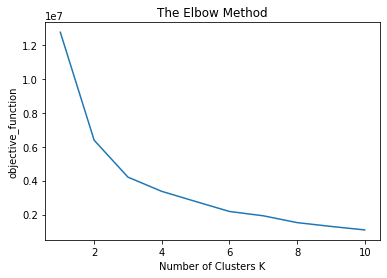

In [98]:
plt.plot(range(1,11),objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('objective_function')
plt.show()

In [99]:
kmeans = KMeans(8)
clusters = kmeans.fit_predict(df[['latitude','longitude']])
df['location_cluster'] = kmeans.predict(df[['latitude','longitude']])

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

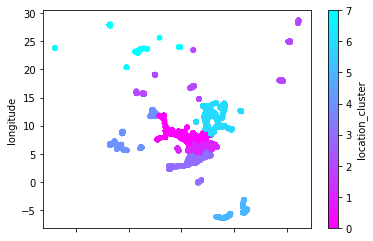

In [100]:
df.plot.scatter(x='latitude',
                y='longitude',
                c='location_cluster',
                colormap='cool_r')

In [101]:
df.head()

,session_id,latitude,longitude,age,endTimeMillis,MobileDNA,model,session,startTimeMillis,startTime,...,date,time,hours,weekday,startTime_session,endTime_session,session_duration,duration_ongoing_session,geohash,location_cluster
0,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:47:02.731000+00:00,...,2020-03-10,17:47:02.731000,17,1,2020-03-10 17:47:02.731000+00:00,2020-03-10 18:11:39.476000+00:00,1476.745,0.0,u1hh9,1
1,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:47:12.582000+00:00,...,2020-03-10,17:47:12.582000,17,1,2020-03-10 17:47:02.731000+00:00,2020-03-10 18:11:39.476000+00:00,1476.745,9.0,u1hh9,1
2,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:47:47.168000+00:00,...,2020-03-10,17:47:47.168000,17,1,2020-03-10 17:47:02.731000+00:00,2020-03-10 18:11:39.476000+00:00,1476.745,44.0,u1hh9,1
3,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:49:50.814000+00:00,...,2020-03-10,17:49:50.814000,17,1,2020-03-10 17:47:02.731000+00:00,2020-03-10 18:11:39.476000+00:00,1476.745,168.0,u1hh9,1
4,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:50:15.502000+00:00,...,2020-03-10,17:50:15.502000,17,1,2020-03-10 17:47:02.731000+00:00,2020-03-10 18:11:39.476000+00:00,1476.745,192.0,u1hh9,1


# App-history related features

In [102]:
#compute time to next app and include a column which contains the category of the next opend app
user_length = {}
average_per_day = {}
average_per_hour = {}
average_per_session = {}
df_lst = []

for user in np.unique(df['EthicaID']): 
    df_single_user = df.loc[df['EthicaID'] == user] 
    d = (pd.to_datetime(df_single_user['startTime'])[1:].reset_index(drop = True) - pd.to_datetime(df_single_user['endTime'])[:len(df_single_user)-1].reset_index(drop = True)).apply(lambda x: x.total_seconds())
    
    null = pd.DataFrame([0])
    d = pd.DataFrame(d)
    d = pd.concat([null, d], axis = 0).reset_index(drop = True)
    #display(d)
    df_single_user = pd.concat([df_single_user.reset_index(drop = True), d], axis = 1)
    prev_cat = df_single_user[['category']].rename({'category': 't+1 category'}, axis = 1)[1:len(df_single_user)]
    df_single_user = pd.concat([df_single_user, prev_cat.dropna().reset_index(drop = True)], axis =1).rename({0: 'time_to_next_app'}, axis = 1)
    
    to_next_next_app = df_single_user[['time_to_next_app']].rename({'time_to_next_app': 'time_to_next_app_t+1'}, axis = 1)[1:len(df_single_user)]
    df_single_user = pd.concat([df_single_user, to_next_next_app.dropna().reset_index(drop = True)], axis =1)
    
    #display(df_single_user)
    
    df_lst.append(df_single_user)
    
    user_length[user] = user_length.get(user, len(df_single_user))
    
    per_day = round(np.average(df_single_user.groupby('date').count()['EthicaID'].values))
    average_per_day[user] = average_per_day.get(user, per_day)
    per_hour =  round(np.average(df_single_user.groupby(['date', 'hours']).count()['EthicaID'].values)) 
    average_per_hour[user] = average_per_hour.get(user, per_hour)
    per_session = round(np.average(df_single_user.groupby(['session_id']).count()['EthicaID'].values)) 
    average_per_session[user] = average_per_session.get(user, per_session)

In [103]:
sum(average_per_day.values()) / len(average_per_day)

195.71505376344086

In [104]:
sum(average_per_session.values()) / len(average_per_session)

7.365591397849462

In [105]:
sum(average_per_hour.values()) / len(average_per_hour)

12.940860215053764

In [106]:
df_full = pd.concat(df_lst, axis = 0)
#df_full['t+1 category'] = df_full['t+1 category'].fillna(df_full['category'].value_counts().reset_index()['index'][0])

In [107]:
df_full['age_category'] = pd.qcut(df_full['age'], q=4, labels= ['17.749, 19.25', '19.25, 20.083', '20.083, 21.75', '21.75, 41.333'])

In [108]:
df_full[['category', 't+1 category', 'time_to_next_app', 'time_to_next_app_t+1', 'startTime', 'endTime']]

,category,t+1 category,time_to_next_app,time_to_next_app_t+1,startTime,endTime
0,Communication,Lifestyle,0.000,0.888,2020-03-10 17:47:02.731000+00:00,2020-03-10 17:47:11.694000+00:00
1,Lifestyle,Tools,0.888,2.343,2020-03-10 17:47:12.582000+00:00,2020-03-10 17:47:44.825000+00:00
2,Tools,Tools,2.343,1.301,2020-03-10 17:47:47.168000+00:00,2020-03-10 17:49:49.513000+00:00
3,Tools,Tools,1.301,1.507,2020-03-10 17:49:50.814000+00:00,2020-03-10 17:50:13.995000+00:00
4,Tools,Photography,1.507,1.933,2020-03-10 17:50:15.502000+00:00,2020-03-10 17:50:15.507000+00:00
...,...,...,...,...,...,...
7277,Social,Social,0.849,2.446,2020-04-22 01:01:28.068000+00:00,2020-04-22 01:01:41.946000+00:00
7278,Social,Communication,2.446,594.985,2020-04-22 01:01:44.392000+00:00,2020-04-22 01:29:06.618000+00:00
7279,Communication,Productivity,594.985,0.152,2020-04-22 01:39:01.603000+00:00,2020-04-22 01:43:48.976000+00:00
7280,Productivity,Communication,0.152,0.017,2020-04-22 01:43:49.128000+00:00,2020-04-22 01:44:27.691000+00:00


# target

In [109]:
#compute use duration quantiles per category to create target variable
duration_quantiles_33 = df_full[['category', 'use_duration']].groupby('category').quantile(q = 0.33)
duration_quantiles_33 = duration_quantiles_33.reset_index().rename({'use_duration' : '33%'}, axis = 1)
duration_quantiles_67 = df_full[['category', 'use_duration']].groupby('category').quantile(q = 0.67)
duration_quantiles_67 = duration_quantiles_67.reset_index().rename({'use_duration' : '67%'}, axis = 1)

In [110]:
#merge both dataframes
duration_quantiles = duration_quantiles_33.merge(duration_quantiles_67, on = 'category')

In [111]:
duration_quantiles.head()

,category,33%,67%
0,Art & Design,13.95150,115.88980
1,Auto & Vehicles,16.46840,127.14872
2,Beauty,0.85706,8.04960
3,Books & Reference,7.60502,101.79996
4,Business,6.93886,30.39806


In [112]:
#search for the indexes to the corresponding categories 
index_short = []
for i in range(len(duration_quantiles)): 
    name = duration_quantiles.loc[i][0]
    array = df[(df.category == name) & (df.use_duration <= duration_quantiles.loc[i]['33%'] )].index
    index_short.extend(array.tolist())
    
index_long= []
for i in range(len(duration_quantiles)): 
    name = duration_quantiles.loc[i][0]
    array = df[(df.category == name) & (df.use_duration >= duration_quantiles.loc[i]['67%'])].index
    index_long.extend(array.tolist()) 

In [113]:
#create dataframe with targets
df_short = pd.DataFrame(index_short)
df_short['target'] = 'short'

df_long = pd.DataFrame(index_long)
df_long['target'] = 'long'

df_target = pd.concat([df_short, df_long], axis = 0)
df_target = df_target.sort_values([0]).set_index([0])

In [114]:
df_target.head()

,target
0,
1,long
2,long
4,short
7,short
8,short


In [119]:
df_full[['use_duration', 'category','target']].head()

,use_duration,category,target
0,8.963,Communication,medium
1,32.243,Lifestyle,long
2,122.345,Tools,long
3,23.181,Tools,medium
4,0.005,Tools,short


In [116]:
#join it to the original dataframe and impute the missing category
df_full = pd.concat([df_full.reset_index(drop = True), df_target], axis = 1)
df_full['target'] = df_full['target'].fillna('medium')

In [117]:
df_full.head()

,session_id,latitude,longitude,age,endTimeMillis,MobileDNA,model,session,startTimeMillis,startTime,...,endTime_session,session_duration,duration_ongoing_session,geohash,location_cluster,time_to_next_app,t+1 category,time_to_next_app_t+1,age_category,target
0,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:47:02.731000+00:00,...,2020-03-10 18:11:39.476000+00:00,1476.745,0.0,u1hh9,1,0.000,Lifestyle,0.888,"20.083, 21.75",medium
1,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:47:12.582000+00:00,...,2020-03-10 18:11:39.476000+00:00,1476.745,9.0,u1hh9,1,0.888,Tools,2.343,"20.083, 21.75",long
2,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:47:47.168000+00:00,...,2020-03-10 18:11:39.476000+00:00,1476.745,44.0,u1hh9,1,2.343,Tools,1.301,"20.083, 21.75",long
3,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:49:50.814000+00:00,...,2020-03-10 18:11:39.476000+00:00,1476.745,168.0,u1hh9,1,1.301,Tools,1.507,"20.083, 21.75",medium
4,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:50:15.502000+00:00,...,2020-03-10 18:11:39.476000+00:00,1476.745,192.0,u1hh9,1,1.507,Photography,1.933,"20.083, 21.75",short


In [120]:
df_full.to_csv('cleaned_data/data_for_eda.csv')

# Scaling of numerical features

In [121]:
#scale numerical features and put them together with needed other variables
df_num = df_full[['use_duration', 'duration_ongoing_session', 'time_to_next_app',  'time_to_next_app_t+1']]
df_num_sca = prepare_num_features(df_num,['use_duration', 'duration_ongoing_session', 'time_to_next_app',  'time_to_next_app_t+1'])
df_cat = df_full.drop(['use_duration', 'duration_ongoing_session', 'time_to_next_app',  'time_to_next_app_t+1'], axis = 1)

In [122]:
df_full = pd.concat([df_cat.reset_index(drop = True), df_num_sca.reset_index(drop = True)], axis = 1)

In [123]:
df_full.columns

Index(['session_id', 'latitude', 'longitude', 'age', 'endTimeMillis',
       'MobileDNA', 'model', 'session', 'startTimeMillis', 'startTime',
       'endTime', 'notification', 'notificationId', 'app_id', 'battery',
       'studyKey', 'surveyId', 'data_version', 'App Name', 'category',
       'EthicaID', 'sex', 'date', 'time', 'hours', 'weekday',
       'startTime_session', 'endTime_session', 'session_duration', 'geohash',
       'location_cluster', 't+1 category', 'age_category', 'target',
       'use_duration', 'duration_ongoing_session', 'time_to_next_app',
       'time_to_next_app_t+1'],
      dtype='object')

In [124]:
df_full.head()

,session_id,latitude,longitude,age,endTimeMillis,MobileDNA,model,session,startTimeMillis,startTime,...,session_duration,geohash,location_cluster,t+1 category,age_category,target,use_duration,duration_ongoing_session,time_to_next_app,time_to_next_app_t+1
0,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:47:02.731000+00:00,...,1476.745,u1hh9,1,Lifestyle,"20.083, 21.75",medium,-0.254762,-0.575649,-0.061127,-0.060984
1,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:47:12.582000+00:00,...,1476.745,u1hh9,1,Tools,"20.083, 21.75",long,-0.171272,-0.571457,-0.060982,-0.060748
2,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:47:47.168000+00:00,...,1476.745,u1hh9,1,Tools,"20.083, 21.75",long,0.151866,-0.555155,-0.060746,-0.060917
3,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:49:50.814000+00:00,...,1476.745,u1hh9,1,Tools,"20.083, 21.75",medium,-0.203771,-0.497399,-0.060915,-0.060883
4,1,51.42149,5.68388,20.75,1.583859e+12,a82d7ae9-5e84-4ce7-8411-3c36a30e6421,SM-G970F,1.583859e+09,1.583859e+12,2020-03-10 17:50:15.502000+00:00,...,1476.745,u1hh9,1,Photography,"20.083, 21.75",short,-0.286889,-0.486220,-0.060882,-0.060814


In [125]:
df_reduced = df_full[['EthicaID', 'use_duration', 'duration_ongoing_session', 'time_to_next_app',  'time_to_next_app_t+1',
                      'age_category','sex', 
                      'notification', 'battery','category','t+1 category',
                      'hours', 'weekday', 'geohash', 'location_cluster', 'target']]

In [126]:
df_reduced.head()

,EthicaID,use_duration,duration_ongoing_session,time_to_next_app,time_to_next_app_t+1,age_category,sex,notification,battery,category,t+1 category,hours,weekday,geohash,location_cluster,target
0,User #10599,-0.254762,-0.575649,-0.061127,-0.060984,"20.083, 21.75",2,True,53.0,Communication,Lifestyle,17,1,u1hh9,1,medium
1,User #10599,-0.171272,-0.571457,-0.060982,-0.060748,"20.083, 21.75",2,False,53.0,Lifestyle,Tools,17,1,u1hh9,1,long
2,User #10599,0.151866,-0.555155,-0.060746,-0.060917,"20.083, 21.75",2,False,53.0,Tools,Tools,17,1,u1hh9,1,long
3,User #10599,-0.203771,-0.497399,-0.060915,-0.060883,"20.083, 21.75",2,False,53.0,Tools,Tools,17,1,u1hh9,1,medium
4,User #10599,-0.286889,-0.486220,-0.060882,-0.060814,"20.083, 21.75",2,False,53.0,Tools,Photography,17,1,u1hh9,1,short


In [127]:
df_reduced.to_csv('cleaned_data/data_with_features.csv')

In [ ]:
session_id.to_csv('cleaned_data/session_id.csv')